In [11]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Ćwiczenie 1

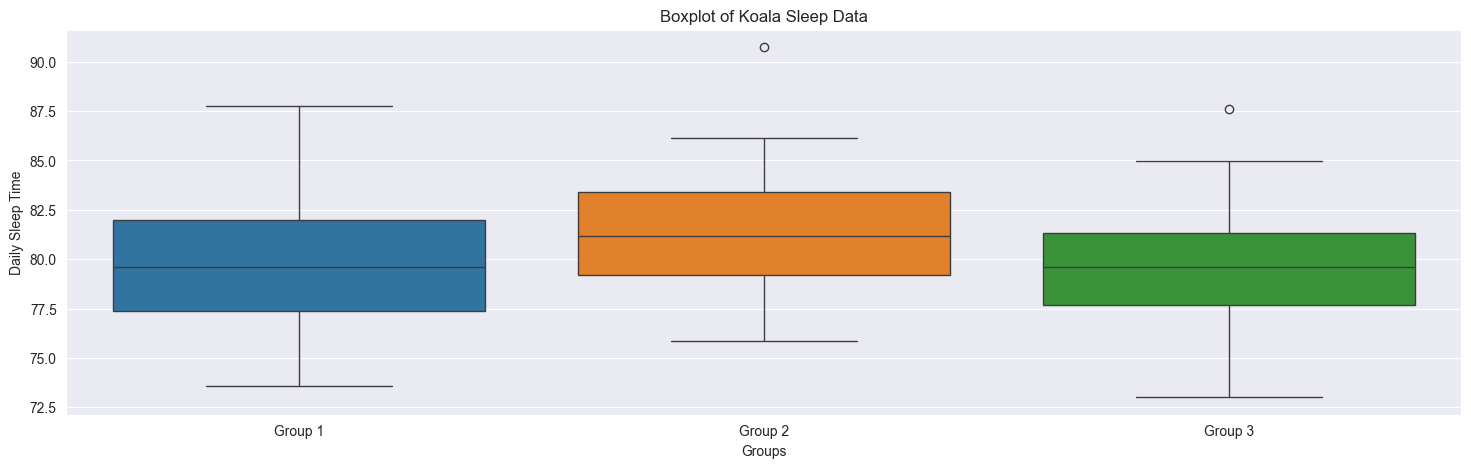

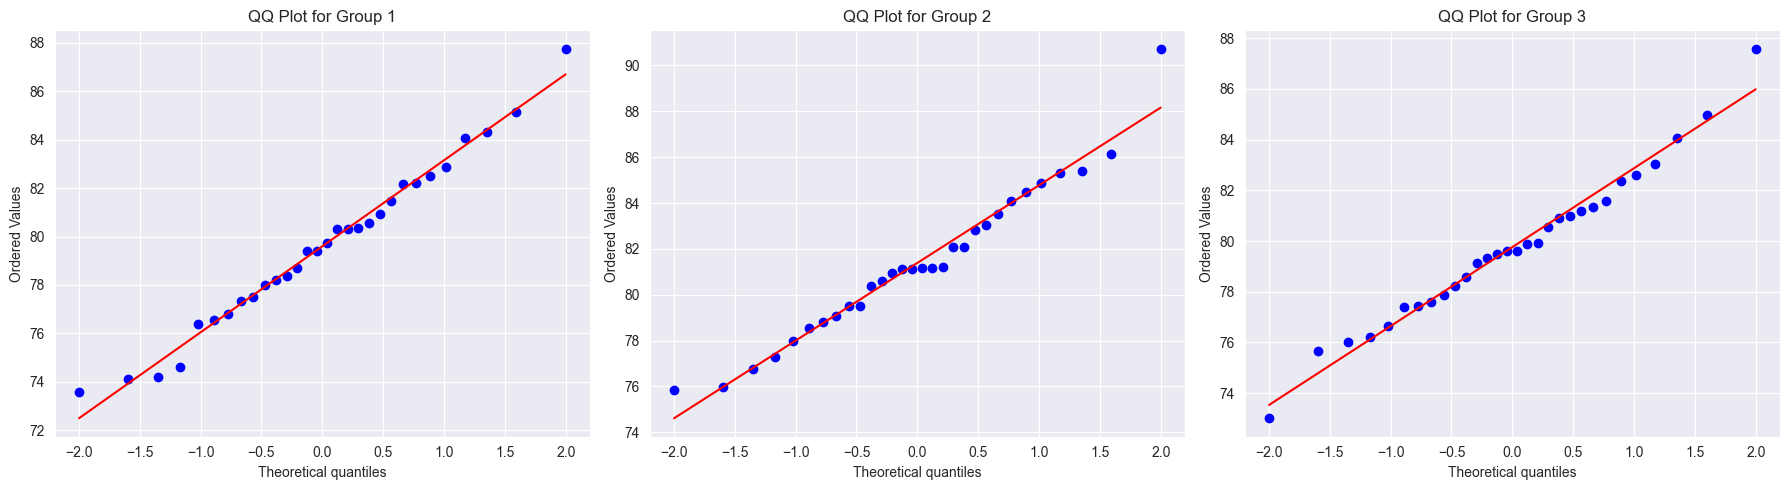


Wyniki testu Shapiro-Wilka dla normalności:
- Grupa 1: p-wartość = 0.9138, wartość statystyki testowej = 0.9837
- Grupa 2: p-wartość = 0.5149, wartość statystyki testowej = 0.9691
- Grupa 3: p-wartość = 0.9757, wartość statystyki testowej = 0.9879

Normalność rozkładu grupy 1: nie ma podstaw do odrzucenia hipotezy zerowej
Normalność rozkładu grupy 2: nie ma podstaw do odrzucenia hipotezy zerowej
Normalność rozkładu grupy 3: nie ma podstaw do odrzucenia hipotezy zerowej

Wynik testu Levene'a na równość wariancji:
- Wartość statystyki testowej: 0.3417
- P-wartość: 0.7115
Równość wariancji: nie ma podstaw do odrzucenia hipotezy zerowej

Wynik jednoczynnikowej analizy wariancji (ANOVA):
- Wartość statystyki testowej: 2.7570
- P-wartość: 0.0690

Interpretacja: Nie możemy odrzucić hipotezy zerowej o równości średnich; brak statystycznie istotnych różnic między grupami


In [13]:
file_path = 'data_6/anova_data.mat'
mat_data = scipy.io.loadmat(file_path)
koala_data = mat_data['koala']

plt.figure(figsize=(18, 5))
sns.boxplot(data=koala_data)
plt.title('Boxplot of Koala Sleep Data')
plt.xlabel('Groups')
plt.ylabel('Daily Sleep Time')
plt.xticks(ticks=[0, 1, 2], labels=['Group 1', 'Group 2', 'Group 3'])
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i in range(koala_data.shape[1]):
    stats.probplot(koala_data[:, i], dist="norm", plot=axs[i])
    axs[i].set_title(f'QQ Plot for Group {i + 1}')
plt.tight_layout()
plt.show()

shapiro_test_1 = [stats.shapiro(koala_data[:, i]) for i in range(koala_data.shape[1])]
levene_test_1 = stats.levene(koala_data[:, 0], koala_data[:, 1], koala_data[:, 2])
anova_result_1 = stats.f_oneway(koala_data[:, 0], koala_data[:, 1], koala_data[:, 2])

alpha = 0.05
interpretacja_anova = ("Możemy odrzucić hipotezę zerową o równości średnich; istnieją statystycznie istotne różnice między grupami"
                       if anova_result_1.pvalue <= alpha
                       else "Nie możemy odrzucić hipotezy zerowej o równości średnich; brak statystycznie istotnych różnic między grupami")

interpretacja_shapiro = [
    "Normalność rozkładu grupy {0}: {1}".format(i + 1, "nie ma podstaw do odrzucenia hipotezy zerowej" if test.pvalue > alpha else "są podstawy do odrzucenia hipotezy zerowej")
    for i, test in
    enumerate(shapiro_test_1)]

interpretacja_levene = "Równość wariancji: {0}".format(
    "nie ma podstaw do odrzucenia hipotezy zerowej" if levene_test_1.pvalue > alpha else "są podstawy do odrzucenia hipotezy zerowej")

print(f"""
Wyniki testu Shapiro-Wilka dla normalności:
- Grupa 1: p-wartość = {shapiro_test_1[0].pvalue:.4f}, wartość statystyki testowej = {shapiro_test_1[0].statistic:.4f}
- Grupa 2: p-wartość = {shapiro_test_1[1].pvalue:.4f}, wartość statystyki testowej = {shapiro_test_1[1].statistic:.4f}
- Grupa 3: p-wartość = {shapiro_test_1[2].pvalue:.4f}, wartość statystyki testowej = {shapiro_test_1[2].statistic:.4f}

{interpretacja_shapiro[0]}
{interpretacja_shapiro[1]}
{interpretacja_shapiro[2]}

Wynik testu Levene'a na równość wariancji:
- Wartość statystyki testowej: {levene_test_1.statistic:.4f}
- P-wartość: {levene_test_1.pvalue:.4f}
{interpretacja_levene}

Wynik jednoczynnikowej analizy wariancji (ANOVA):
- Wartość statystyki testowej: {anova_result_1.statistic:.4f}
- P-wartość: {anova_result_1.pvalue:.4f}

Interpretacja: {interpretacja_anova}
""")


# Ćwiczenie 2

ANOVA result:
F-statistic: 3.5664846248930004, p-value: 0.04338747516521317

Ponieważ p-value z ANOVA jest mniejsze niż 0.05, przeprowadzamy test post-hoc Tukeya HSD.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   4.2893 0.0339  0.2885   8.29   True
     1      3   1.8519 0.4511 -1.9201 5.6239  False
     2      3  -2.4374    0.3 -6.4381 1.5634  False
---------------------------------------------------


<Figure size 1800x500 with 0 Axes>

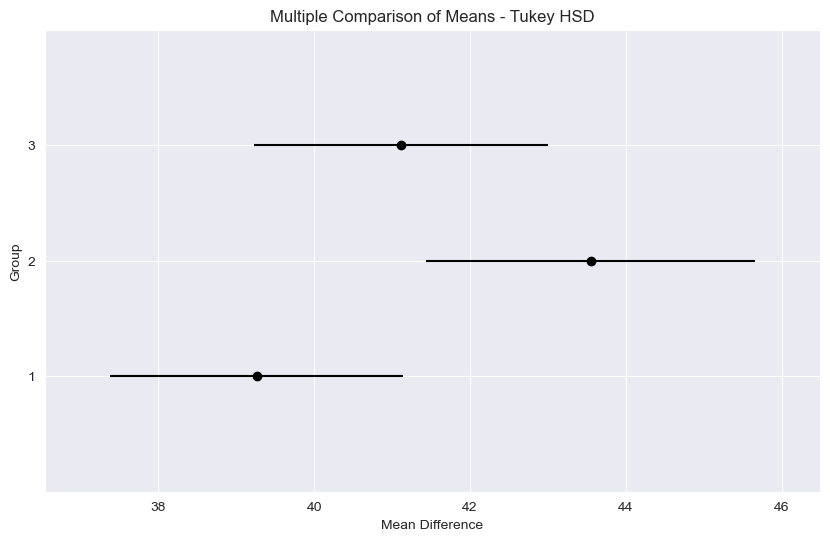

In [22]:
wombats_data = mat_data['wombats']
wombat_groups = mat_data['wombat_groups'].flatten()

anova_result = stats.f_oneway(*(wombats_data[:, wombat_groups == group].flatten() for group in np.unique(wombat_groups)))

print(f"ANOVA result:\nF-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}\n")

if anova_result.pvalue < 0.05:
    print("Ponieważ p-value z ANOVA jest mniejsze niż 0.05, przeprowadzamy test post-hoc Tukeya HSD.\n")

    data_flat = wombats_data.flatten()
    groups_flat = np.repeat(np.unique(wombat_groups), repeats=[sum(wombat_groups == group) for group in np.unique(wombat_groups)])

    tukey_result = pairwise_tukeyhsd(endog=data_flat, groups=groups_flat, alpha=0.05)

    print(tukey_result)
    plt.figure(figsize=(18, 5))
    tukey_result.plot_simultaneous(xlabel='Mean Difference', ylabel='Group')
    plt.title('Multiple Comparison of Means - Tukey HSD')
    plt.grid(True)
    plt.show()

else:
    print("Brak statystycznie istotnych różnic między grupami.")
# czyli istnieje znacząca różnica pomiędzy 1 i 2 grupą, 

# Ćwiczenie 3

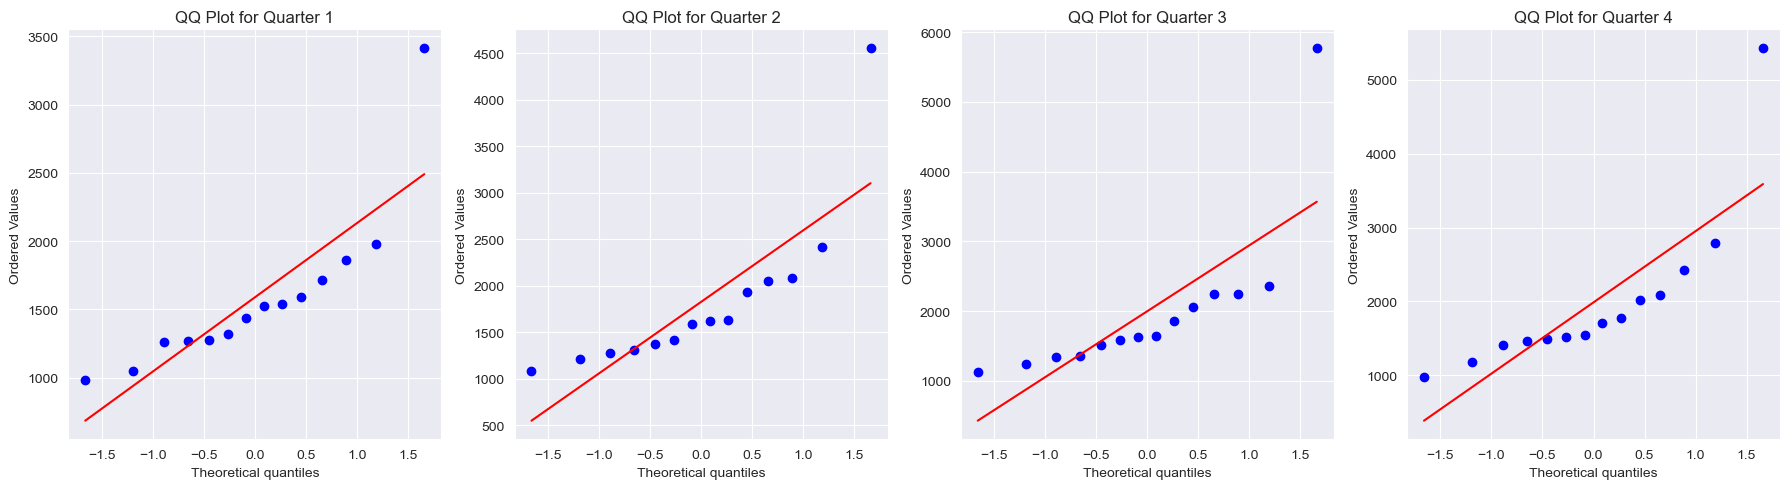


Wyniki testu Shapiro-Wilka dla normalności danych sprzedażowych:
- Kwartał 1: p-wartość = 0.0014, interpretacja: Normalność rozkładu dla kwartału 1: są podstawy do odrzucenia hipotezy zerowej
- Kwartał 2: p-wartość = 0.0004, interpretacja: Normalność rozkładu dla kwartału 2: są podstawy do odrzucenia hipotezy zerowej
- Kwartał 3: p-wartość = 0.0001, interpretacja: Normalność rozkładu dla kwartału 3: są podstawy do odrzucenia hipotezy zerowej
- Kwartał 4: p-wartość = 0.0004, interpretacja: Normalność rozkładu dla kwartału 4: są podstawy do odrzucenia hipotezy zerowej

# Wynik testu Kruskala-Wallisa na różnice median między kwartałami:
# - Wartość statystyki testowej: 2.6976
# - P-wartość: 0.4406
# 
# Interpretacja testu Kruskala-Wallisa: Różnice median między kwartałami: nie ma podstaw do odrzucenia hipotezy zerowej

Wynik testu Friedmana na różnice w sprzedaży między kwartałami:
- Wartość statystyki testowej: 23.9143
- P-wartość: 0.0000

Interpretacja testu Friedmana: Różnice w sprzed

In [15]:
sales_data = np.array([
    [3415, 4556, 5772, 5432],
    [1593, 1937, 2242, 2794],
    [1976, 2056, 2240, 2085],
    [1526, 1594, 1644, 1705],
    [1538, 1634, 1866, 1769],
    [983, 1086, 1135, 1177],
    [1050, 1209, 1245, 977],
    [1861, 2087, 2054, 2018],
    [1714, 2415, 2361, 2424],
    [1320, 1621, 1624, 1551],
    [1276, 1377, 1522, 1412],
    [1263, 1279, 1350, 1490],
    [1271, 1417, 1583, 1513],
    [1436, 1310, 1357, 1468]
])

fig, axs = plt.subplots(1, 4, figsize=(18, 5))
for i in range(sales_data.shape[1]):
    stats.probplot(sales_data[:, i], dist="norm", plot=axs[i])
    axs[i].set_title(f'QQ Plot for Quarter {i + 1}')
plt.tight_layout()
plt.show()

alpha = 0.05
#Dla testu Shapiro-Wilka (normalność rozkładu):
# H0: Dane w każdym kwartale mają rozkład normalny.
# H1: Dane w co najmniej jednym kwartale nie mają rozkładu normalnego.
shapiro_results = [stats.shapiro(sales_data[:, i]) for i in range(sales_data.shape[1])]

# Dla testu Kruskala-Wallisa (różnice median):
# H0: Mediany we wszystkich grupach są równe.
# H1: Przynajmniej jedna grupa ma medianę różną od innych grup.
kruskal_result = stats.kruskal(sales_data[:, 0], sales_data[:, 1], sales_data[:, 2], sales_data[:, 3])

# Hipoteza zerowa (H0):
# Nie ma różnic w medianach między poszczególnymi grupami (lub warunkami).
# Hipoteza alternatywna (H1):
# Istnieją różnice w medianach między co najmniej dwiema z grup. 
friedman_result = stats.friedmanchisquare(sales_data[:, 0], sales_data[:, 1], sales_data[:, 2], sales_data[:, 3])

interpretacja_shapiro_sales = [
    f"Normalność rozkładu dla kwartału {i + 1}: {'nie ma podstaw do odrzucenia hipotezy zerowej' if test.pvalue > alpha else 'są podstawy do odrzucenia hipotezy zerowej'}" for
    i, test in enumerate(shapiro_results)]
interpretacja_kruskal = f"Różnice median między kwartałami: {'nie ma podstaw do odrzucenia hipotezy zerowej' if kruskal_result.pvalue > alpha else 'są podstawy do odrzucenia hipotezy zerowej'}"
interpretacja_friedmana = f"Różnice w sprzedaży między kwartałami: {'nie ma podstaw do odrzucenia hipotezy zerowej' if friedman_result.pvalue > alpha else 'są podstawy do odrzucenia hipotezy zerowej'}"

print(f"""
Wyniki testu Shapiro-Wilka dla normalności danych sprzedażowych:
- Kwartał 1: p-wartość = {shapiro_results[0].pvalue:.4f}, interpretacja: {interpretacja_shapiro_sales[0]}
- Kwartał 2: p-wartość = {shapiro_results[1].pvalue:.4f}, interpretacja: {interpretacja_shapiro_sales[1]}
- Kwartał 3: p-wartość = {shapiro_results[2].pvalue:.4f}, interpretacja: {interpretacja_shapiro_sales[2]}
- Kwartał 4: p-wartość = {shapiro_results[3].pvalue:.4f}, interpretacja: {interpretacja_shapiro_sales[3]}

# Wynik testu Kruskala-Wallisa na różnice median między kwartałami:
# - Wartość statystyki testowej: {kruskal_result.statistic:.4f}
# - P-wartość: {kruskal_result.pvalue:.4f}
# 
# Interpretacja testu Kruskala-Wallisa: {interpretacja_kruskal}

Wynik testu Friedmana na różnice w sprzedaży między kwartałami:
- Wartość statystyki testowej: {friedman_result.statistic:.4f}
- P-wartość: {friedman_result.pvalue:.4f}

Interpretacja testu Friedmana: {interpretacja_friedmana}
""")


# Wniosek: Nie ma statystycznych podstaw do sądzenia, że kampania miała wpływ na sprzedaż w poszczególnych kwartałach.
# Pytania: jak test s-w sprawdza to wtedy nie ma sensu levene'a 
# czy te grupy są zależne?

# Ćwiczenie 4

In [7]:
from statsmodels.stats.multicomp import MultiComparison

# Pytania:
# czy to ma być test tkeyhsd?

data = np.array([5.5, 5.5, 6.0, 6.5, 7.0, 7.0, 4.5, 4.5, 4.0, 5.0, 5.5, 5.0, 3.5, 4.0, 3.0, 4.0, 5.0, 4.5])
groups = ['Prod1_Air', 'Prod1_Air', 'Prod1_Air',
          'Prod2_Air', 'Prod2_Air', 'Prod2_Air',
          'Prod3_Air', 'Prod3_Air', 'Prod3_Air',
          'Prod1_Oil', 'Prod1_Oil', 'Prod1_Oil',
          'Prod2_Oil', 'Prod2_Oil', 'Prod2_Oil',
          'Prod3_Oil', 'Prod3_Oil', 'Prod3_Oil']

import pandas as pd

data_flat = np.concatenate([data])
groups_flat = np.concatenate([groups])

# Utworzenie DataFrame dla łatwiejszej manipulacji
df = pd.DataFrame({'Value': data_flat, 'Group': groups_flat})

# MultiComparison
mc = MultiComparison(df['Value'], df['Group'])
result = mc.tukeyhsd()

# Wypisanie wyników
print(result)
# 
# Producent 1 (Powietrzna vs. Olejowa): Brak statystycznie istotnej różnicy w ilości kubków popcornu (-0.5, p=0.5886). Oznacza to, że dla producenta 1, wybór między maszyną powietrzną a olejową nie ma znaczącego wpływu na ilość produkowanego popcornu.
# 
# Producent 1 vs. Producent 2 (Powietrzna): Istotna statystycznie różnica (1.1667, p=0.0224), wskazująca na większą efektywność producenta 2 przy użyciu maszyny powietrznej w porównaniu z producentem 1.
# 
# Producent 1 (Powietrzna) vs. Producent 2 (Olejowa): Znacząca różnica (-2.1667, p=0.0001), sugerująca, że producent 2 z maszyną olejową jest znacznie mniej efektywny niż producent 1 z maszyną powietrzną.
# 
# Porównania między Producentem 1 a Producentami 3 (zarówno dla maszyn powietrznych jak i olejowych) pokazują istotne różnice, co wskazuje na niższą efektywność producentów 3 w stosunku do producenta 1.
# 
# Producent 1 (Olejowa) vs. Producent 2 (Powietrzna): Statystycznie istotna różnica (1.6667, p=0.0015) pokazuje, że producent 2 przy użyciu maszyny powietrznej jest bardziej efektywny niż producent 1 z maszyną olejową.
# 
# Największa różnica zaobserwowana została między producentem 2 używającym maszyny powietrznej a tym samym producentem używającym maszyny olejowej (-3.3333, p=0.0). Jest to najbardziej znacząca różnica, wskazująca na znacznie lepszą efektywność producenta 2 przy użyciu maszyny powietrznej.
# 
# Ogólne wnioski:
# Typ maszyny ma znaczący wpływ na ilość produkowanego popcornu, przy czym maszyny powietrzne wydają się być bardziej efektywne dla niektórych producentów.
# Istnieją znaczące różnice w efektywności między różnymi producentami, zarówno przy użyciu maszyn powietrznych, jak i olejowych.
# Producent 2, używając maszyny powietrznej, okazał się być najbardziej efektywny w porównaniu z innymi kombinacjami producentów i typów maszyn.
# Wybór maszyny (powietrzna vs. olejowa) powinien być rozważany indywidualnie dla każdego producenta, biorąc pod uwagę specyfikę produkcji i efektywność.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Prod1_Air Prod1_Oil     -0.5 0.5886 -1.5221  0.5221  False
Prod1_Air Prod2_Air   1.1667 0.0224  0.1446  2.1888   True
Prod1_Air Prod2_Oil  -2.1667 0.0001 -3.1888 -1.1446   True
Prod1_Air Prod3_Air  -1.3333 0.0089 -2.3554 -0.3112   True
Prod1_Air Prod3_Oil  -1.1667 0.0224 -2.1888 -0.1446   True
Prod1_Oil Prod2_Air   1.6667 0.0015  0.6446  2.6888   True
Prod1_Oil Prod2_Oil  -1.6667 0.0015 -2.6888 -0.6446   True
Prod1_Oil Prod3_Air  -0.8333 0.1376 -1.8554  0.1888  False
Prod1_Oil Prod3_Oil  -0.6667 0.3086 -1.6888  0.3554  False
Prod2_Air Prod2_Oil  -3.3333    0.0 -4.3554 -2.3112   True
Prod2_Air Prod3_Air     -2.5    0.0 -3.5221 -1.4779   True
Prod2_Air Prod3_Oil  -2.3333 0.0001 -3.3554 -1.3112   True
Prod2_Oil Prod3_Air   0.8333 0.1376 -0.1888  1.8554  False
Prod2_Oil Prod3_Oil      1.0 0.0564 -0.0221  2.0221  Fal

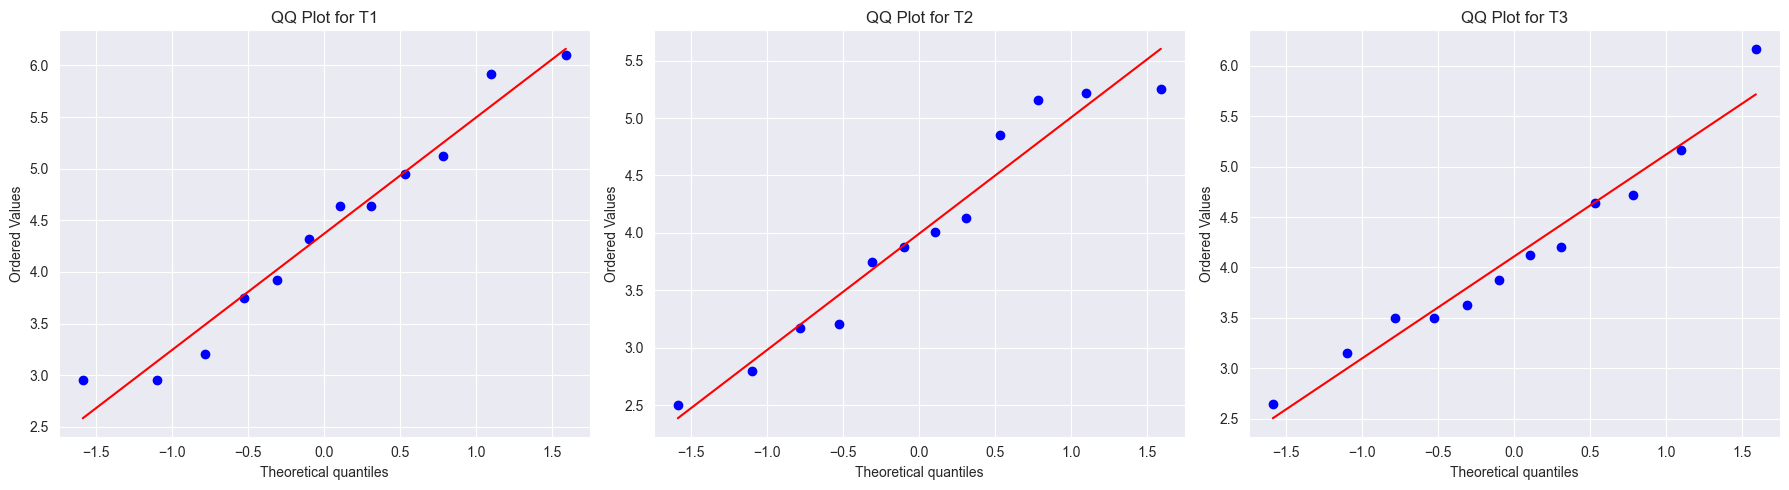

Normalność rozkładu dla substancji T1: nie ma podstaw do odrzucenia hipotezy zerowej
Normalność rozkładu dla substancji T2: nie ma podstaw do odrzucenia hipotezy zerowej
Normalność rozkładu dla substancji T3: nie ma podstaw do odrzucenia hipotezy zerowej
Równość wariancji: nie ma podstaw do odrzucenia hipotezy zerowej
                          sum_sq    df         F    PR(>F)
C(Substance)            0.900867   2.0  0.415944  0.663873
C(Plant)                0.782600   2.0  0.361339  0.700061
C(Substance):C(Plant)   2.711033   4.0  0.625863  0.648125
Residual               29.238775  27.0       NaN       NaN


In [12]:

data = {
    'FEV': [4.64, 5.12, 4.64, 3.21, 3.92, 4.95, 3.75, 2.95, 2.95, 5.92, 6.10, 4.32, 3.17, 3.75, 5.22, 2.50, 3.21, 2.80,
            5.25, 4.85, 4.13, 3.88, 4.01, 5.16, 2.65, 3.15, 3.63, 6.17, 4.72, 5.17, 3.50, 4.64, 3.50, 4.12, 3.88, 4.20,
            5.36, 3.77, 4.47, 3.63, 4.35, 3.09, 2.30, 2.19, 5.90, 4.13, 3.85, 4.12, 3.46, 4.89, 2.90, 2.76, 3.32, 5.07,
            3.85, 4.12, 3.46, 4.89, 3.25, 3.07, 5.31, 3.39, 4.98, 2.75, 2.31, 3.99, 2.02, 4.11, 4.37, 5.85, 3.65, 3.62,
            3.19, 4.76, 2.42, 2.64, 2.90, 3.76, 2.64, 1.02, 5.03, 1.25, 3.04, 9.73, 4.93, 0.73, 5.15, 2.31, 9.92, 0.24,
            1.14, 3.75, 5.85, 3.65, 3.62, 3.19, 4.76, 2.42, 2.64, 2.90, 3.76, 2.64, 1.02, 5.03, 1.25, 3.04, 9.73, 4.93,
            0.73, 5.15, 2.31, 9.92, 0.24, 1.14],
    'Substance': ['T1'] * 12 + ['T2'] * 12 + ['T3'] * 12 + ['T1'] * 12 + ['T2'] * 12 + ['T3'] * 12,
    'Plant': ['Z1'] * 3 + ['Z2'] * 3 + ['Z3'] * 3 + ['Z1'] * 3 + ['Z2'] * 3 + ['Z3'] * 3 + ['Z1'] * 3 + ['Z2'] * 3 + ['Z3'] * 3 + ['Z1'] * 3 + ['Z2'] * 3 + ['Z3'] * 3
}

corrected_data = {
    'FEV': data['FEV'][:36],  # Biorąc pod uwagę, że każda kombinacja ma taką samą liczbę pomiarów
    'Substance': ['T1'] * 12 + ['T2'] * 12 + ['T3'] * 12,
    'Plant': ['Z1'] * 4 + ['Z2'] * 4 + ['Z3'] * 4 + ['Z1'] * 4 + ['Z2'] * 4 + ['Z3'] * 4 + ['Z1'] * 4 + ['Z2'] * 4 + ['Z3'] * 4
}

corrected_df = pd.DataFrame(corrected_data)



shapiro_results = {group: stats.shapiro(corrected_df[corrected_df['Substance'] == group]['FEV']) for group in corrected_df['Substance'].unique()}

# Test Levene'a dla równości wariancji między grupami
levene_result = stats.levene(
    corrected_df[corrected_df['Substance'] == 'T1']['FEV'],
    corrected_df[corrected_df['Substance'] == 'T2']['FEV'],
    corrected_df[corrected_df['Substance'] == 'T3']['FEV']
)

# QQ Plots dla wizualnej oceny normalności
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, substance in enumerate(corrected_df['Substance'].unique()):
    stats.probplot(corrected_df[corrected_df['Substance'] == substance]['FEV'], dist="norm", plot=axs[i])
    axs[i].set_title(f'QQ Plot for {substance}')
plt.tight_layout()
plt.show()

# Wyświetlenie wyników testów
shapiro_interpretations = [
    f"Normalność rozkładu dla substancji {group}: {'nie ma podstaw do odrzucenia hipotezy zerowej' if result.pvalue > alpha else 'są podstawy do odrzucenia hipotezy zerowej'}" for
    group, result in shapiro_results.items()]
levene_interpretation = f"Równość wariancji: {'nie ma podstaw do odrzucenia hipotezy zerowej' if levene_result.pvalue > alpha else 'są podstawy do odrzucenia hipotezy zerowej'}"

print(*shapiro_interpretations, sep='\n')
print(levene_interpretation)

# Dwuczynnikowa ANOVA dla poprawionych danych
corrected_model = ols('FEV ~ C(Substance) + C(Plant) + C(Substance):C(Plant)', data=corrected_df).fit()
corrected_anova_results = sm.stats.anova_lm(corrected_model, typ=2)

print(corrected_anova_results)

# Hipotezy dla testu ANOVA two-way:
# H0 (hipoteza zerowa) dla substancji toksycznych: Średnie wartości FEV są równe dla wszystkich grup substancji toksycznych. Oznacza to, że substancje toksyczne nie mają statystycznie istotnego wpływu na FEV pracowników.
# 
# H0 (hipoteza zerowa) dla zakładów: Średnie wartości FEV są równe dla wszystkich grup zakładów. Oznacza to, że zakłady pracy nie mają statystycznie istotnego wpływu na FEV pracowników.
# 
# H0 (hipoteza zerowa) dla interakcji substancji i zakładów: Nie ma interakcji między substancjami toksycznymi a zakładami pracy w kontekście wpływu na FEV, co oznacza, że kombinacja specyficznej substancji toksycznej i zakładu pracy nie ma statystycznie istotnego wpływu na FEV pracowników ponad wpływ tych czynników rozpatrywanych indywidualnie.
# 
# Analiza wyników ANOVA two-way:
# Wyniki dwuczynnikowej analizy wariancji (ANOVA) dla naszych danych pokazują, że:
# 
# Dla substancji toksycznych (p=0.663873): Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową. Oznacza to, że nie ma statystycznie istotnych różnic w średnich wartościach FEV między różnymi substancjami toksycznymi.
# 
# Dla zakładów (p=0.700061): Podobnie, nie ma wystarczających dowodów, aby odrzucić hipotezę zerową. Oznacza to, że nie ma statystycznie istotnych różnic w średnich wartościach FEV między różnymi zakładami pracy.
# 
# Dla interakcji substancji i zakładów (p=0.648125): Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową dotyczącą braku interakcji między substancjami toksycznymi a zakładami pracy. Oznacza to, że kombinacja specyficznej substancji toksycznej i zakładu pracy nie wpływa statystycznie istotnie na FEV pracowników.
# 
# Wnioski:
# Nie zaobserwowano statystycznie istotnego wpływu ani substancji toksycznych, ani zakładów pracy, ani ich interakcji na objętość wymuszonego wydechu (FEV) pracowników.
# 
# Wyniki sugerują, że inne czynniki nieuwzględnione w tej analizie mogą wpływać na FEV lub że wpływ badanych substancji i warunków pracy na FEV jest minimalny.